# /5评估数据/ Assessing
Use the space below to explore `all_alpha_08.csv` and `all_alpha_18.csv` to answer the quiz questions below.

In [1461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
df08 = pd.read_csv('all_alpha_08.txt', sep = '\t')
df18 = pd.read_csv('all_alpha_18.txt', sep = '\t')
# 注意原文件链接为xlsx、zip和txt（不是csv，csv课程中没给出链接）
# 使用read_csv读入，发现没有分列，看样子是tab分割
# 加个 sep = '\t'指定使用tab分割解决
# （mac 遇到奇怪问题下载的文件都很奇怪，可能和单位网有关）

In [1462]:
df08.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no


In [1463]:
df18.head(3)

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
1,ACURA ILX,2.4,4.0,AMS-8,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXV02.4NH3,small car,3,25,35,29,6,No,309
2,ACURA MDX,3.0,6.0,AMS-7,4WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV03.08H3,small SUV,3,26,27,27,6,No,330


1.每个数据集中的样本数

2.每个数据集中的列数

In [1464]:
print(df08.shape)
print(df18.shape)

(2404, 18)
(2648, 18)


3.每个数据集中重复的行数

In [1465]:
sum_dup_08 = sum(df08.duplicated())
sum_dup_18 = sum(df18.duplicated())
print(sum_dup_08,sum_dup_18)

25 0


4.列的数据类型

In [1466]:
df08.dtypes

Model                    object
Displ                   float64
Cyl                      object
Trans                    object
Drive                    object
Fuel                     object
Sales Area               object
Stnd                     object
Underhood ID             object
Veh Class                object
Air Pollution Score      object
FE Calc Appr             object
City MPG                 object
Hwy MPG                  object
Cmb MPG                  object
Unadj Cmb MPG           float64
Greenhouse Gas Score     object
SmartWay                 object
dtype: object

5.具有缺失值的特征

In [1467]:
null_list = []
for i in df08.columns:
    if df08[i].isnull().any():
        null_list.append(i)
null_list
# 使用判断把空置输出为一列

['Cyl',
 'Trans',
 'Drive',
 'FE Calc Appr',
 'City MPG',
 'Hwy MPG',
 'Cmb MPG',
 'Unadj Cmb MPG',
 'Greenhouse Gas Score']

In [1468]:
# 使用isnull.sum检查数量
nucheck = df08.isnull().sum()
nucheck

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [1469]:
# 看下占的百分比
round(nucheck/df08.shape[0],3)
# round(float,n) 的作用是把float小数，保留到小数点后n位
# 当然了 nucheck是求出的丢失值的数量，df08.shape[0]是所有项，案例1有讲

Model                   0.000
Displ                   0.000
Cyl                     0.083
Trans                   0.083
Drive                   0.039
Fuel                    0.000
Sales Area              0.000
Stnd                    0.000
Underhood ID            0.000
Veh Class               0.000
Air Pollution Score     0.000
FE Calc Appr            0.083
City MPG                0.083
Hwy MPG                 0.083
Cmb MPG                 0.083
Unadj Cmb MPG           0.083
Greenhouse Gas Score    0.083
SmartWay                0.000
dtype: float64

6.每个数据集中特征的非空唯一值的数量

In [1470]:
for i in df08.columns:
    print(i, end = ' : ')
    print(df08[i].nunique())
# 可以使用格式化字符串来更好的显示，略过

Model : 436
Displ : 47
Cyl : 8
Trans : 14
Drive : 2
Fuel : 5
Sales Area : 3
Stnd : 12
Underhood ID : 343
Veh Class : 9
Air Pollution Score : 13
FE Calc Appr : 2
City MPG : 39
Hwy MPG : 43
Cmb MPG : 38
Unadj Cmb MPG : 721
Greenhouse Gas Score : 20
SmartWay : 2


In [1471]:
# 这些唯一值都是什么，以及每个的计数

In [1472]:
# 加上value_counts 看下（车型较多有400多种）
# 使用[1:]将车型过滤掉
for i in df08.columns[1:]:
    print('\n', i, ':')
    print(df08[i].value_counts())


 Displ :
3.5    194
2.4    184
2.5    171
3.0    158
2.0    132
3.6    110
5.3    108
6.0    103
3.7     86
5.4     81
4.0     80
4.6     80
4.8     74
2.3     71
2.7     68
3.8     62
5.7     59
4.2     57
4.7     45
6.2     41
1.8     36
3.2     34
2.2     30
5.5     30
5.0     29
3.3     24
1.6     24
2.9     24
4.3     22
5.6     20
3.1     18
4.4     16
3.4     16
6.7     14
6.8     13
1.5     12
6.1     12
5.9     12
2.8     12
6.5     10
3.9      8
4.5      6
1.3      6
8.4      4
5.2      4
7.0      2
8.0      2
Name: Displ, dtype: int64

 Cyl :
(6 cyl)     864
(4 cyl)     600
(8 cyl)     533
(5 cyl)     113
(12 cyl)     60
(10 cyl)     29
(2 cyl)       4
(16 cyl)      2
Name: Cyl, dtype: int64

 Trans :
Auto-L4    502
Auto-L5    329
Auto-S6    327
Man-6      295
Man-5      269
Auto-S5    147
Auto-L6    118
Auto-AV     86
Auto-L7     42
Auto-S4     42
Auto-S7     22
Auto-4      10
S8           8
Auto-6       8
Name: Trans, dtype: int64

 Drive :
2WD    1525
4WD     786
Name: D

# /6清理列标签/ 清除列标签
使用 all_alpha_08.csv 和 all_alpha_18.csv

In [1473]:
#先检查下原有数据
print(df08.shape)
df08.columns

(2404, 18)


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [1474]:
# 丢弃多余列
drop_list = ['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG']
df08.drop(drop_list, axis=1, inplace=True)
print(df08.shape)
df08.columns

(2404, 14)


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [1475]:
drop_list = ['Stnd','Stnd Description','Underhood ID','Comb CO2']
df18.drop(drop_list, axis=1, inplace=True)
print(df08.shape)
df18.columns

(2404, 14)


Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

In [1476]:
# 先检查一下有没有列不同的
df08.columns == df18.columns
# 输出是个boolean的列表，比较直观

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True])

In [1477]:
# 把08列的名字得出来
for i in df08.columns:
    if i not in df18.columns:
        print(i)

# 把18列的名字得出来
for i in df18.columns:
    if i not in df08.columns:
        print(i)      

Sales Area
Cert Region


In [1478]:
# 将08的替换为18的
df08.rename(columns = 
            lambda x: x.replace('Sales Area', 'Cert Region'), 
            inplace = True)
# 这里使用的是lambda x:
# 就是对columns执行后面的操作 x.replace
# 而x.replace的操作是把后面小括弧中的前面替换成后面

In [1479]:
# 还有就是把列中的空格替换成下滑线
# 因为很多处理要对空格判断，不要有比较好
# 全部变为小写是习惯，了解一下吧
df08.rename(columns=lambda x:
             x.strip().lower().replace(" ", "_"),
             inplace=True)
# .strip是去除单词首尾的空格
# .lower是变为小写
# .replace是把小括弧里的做替换
df08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [1480]:
# df18 也做一遍，再检查列是否一致
df18.rename(columns=lambda x:
             x.strip().lower().replace(" ", "_"),
             inplace=True)
print(df18.columns)
df08.columns == df18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [1481]:
# 也可以用这个，比较安静的，因为加了.all()所以只会出一个True或者False
(df08.columns == df18.columns).all()

True

In [1482]:
# 保存数据
df08.to_csv('data_08.csv', index=False)
df18.to_csv('data_18.csv', index=False)

# /7过滤、丢空、去重/ 过滤、丢弃空值、重复数据删除
使用 data_08.csv 和 data_18.csv

In [1483]:
# 按认证区域过滤09
def cleancol(df):
    print(df.shape)
    df['cert_region'].unique()
    df = df.query('cert_region == "CA"')
    print(df.shape)      
    print(df['cert_region'].unique())
    df.drop(['cert_region'],axis=1,inplace=True)
    print(df.shape) 
    return df.info()


cleancol(df18)
cleancol(df08)
# 此cell如果执行多遍会有问题因为已经drop了cert_region
# 少年，要不要使用try/except优化了？
# 另外后面有个报错，怎么优化呢？

(2648, 14)
(1307, 14)
['CA']
(1307, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 2646
Data columns (total 13 columns):
model                   1307 non-null object
displ                   1292 non-null float64
cyl                     1292 non-null float64
trans                   1307 non-null object
drive                   1307 non-null object
fuel                    1307 non-null object
veh_class               1307 non-null object
air_pollution_score     1307 non-null int64
city_mpg                1307 non-null object
hwy_mpg                 1307 non-null object
cmb_mpg                 1307 non-null object
greenhouse_gas_score    1307 non-null int64
smartway                1307 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 143.0+ KB
(2404, 14)
(1084, 14)
['CA']
(1084, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 0 to 2400
Data columns (total 13 columns):
model                   1084 non-null object
displ       

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1484]:
# 丢弃含有缺失值的行
# 检查下缺失值
print(df08.isnull().sum())
# 丢弃有缺失的
df08.dropna(inplace = True)
df08.isnull().sum()

model                     0
displ                     0
cyl                     199
trans                   199
drive                    93
fuel                      0
cert_region               0
veh_class                 0
air_pollution_score       0
city_mpg                199
hwy_mpg                 199
cmb_mpg                 199
greenhouse_gas_score    199
smartway                  0
dtype: int64


model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
cert_region             0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [1485]:
print(df18.isnull().sum())
df18.dropna(inplace = True)
df18.isnull().sum()

model                    0
displ                   36
cyl                     36
trans                    0
drive                    0
fuel                     0
cert_region              0
veh_class                0
air_pollution_score      0
city_mpg                 0
hwy_mpg                  0
cmb_mpg                  0
greenhouse_gas_score     0
smartway                 0
dtype: int64


model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
cert_region             0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

In [1486]:
# double check 一下
df08.isnull().sum().any()

False

In [1487]:
df18.isnull().sum().any()

False

In [1488]:
# 重复数据删除
print(df08.duplicated().sum())
df08.drop_duplicates(inplace = True)
print(df08.duplicated().sum())

63
0


In [1489]:
print(df18.duplicated().sum())
df18.drop_duplicates(inplace = True)
print(df18.duplicated().sum())

22
0


In [1490]:
# 保存进度，以便下一段使用
df08.to_csv('data_08b.csv', index=False)
df18.to_csv('data_18b.csv', index=False)
# 建议使用不同的文件名，等都完成后再调优，避免覆盖文件带来的麻烦

# /8检查数据类型/ Inspecting Data Types
Use the space below to explore data_08.csv and data_18.csv to answer the quiz questions below regarding datatypes.

In [1491]:
print(df08.head(1))
type(df08.info())

       model  displ      cyl    trans drive      fuel cert_region veh_class  \
0  ACURA MDX    3.7  (6 cyl)  Auto-S5   4WD  Gasoline          CA       SUV   

  air_pollution_score city_mpg hwy_mpg cmb_mpg greenhouse_gas_score smartway  
0                   7       15      20      17                    4       no  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2403
Data columns (total 14 columns):
model                   2142 non-null object
displ                   2142 non-null float64
cyl                     2142 non-null object
trans                   2142 non-null object
drive                   2142 non-null object
fuel                    2142 non-null object
cert_region             2142 non-null object
veh_class               2142 non-null object
air_pollution_score     2142 non-null object
city_mpg                2142 non-null object
hwy_mpg                 2142 non-null object
cmb_mpg                 2142 non-null object
greenhouse_gas_score    2142 non-nu

NoneType

- cyl字符串要转换成数字
- air_polution转成浮点（object是字符串）
- city_mpg、hwy_mpg、cmb_mpg将字符串转换为浮点型
- greenhouse_gas_score从字符转为浮点

# /9修正数据类型第1部分/

In [1492]:
# 使用str的extract检索里面的数字
print(df08['cyl'].value_counts())
df08['cyl'] = df08['cyl'].str.extract('(\d+)').astype(int)
# （\d+)是匹配任意数字的意思，有兴趣的可以看看reg或者回顾week2格式化字符串
print(df08['cyl'].value_counts())
type(df08['cyl'][0])

(6 cyl)     836
(4 cyl)     582
(8 cyl)     516
(5 cyl)     113
(12 cyl)     60
(10 cyl)     29
(2 cyl)       4
(16 cyl)      2
Name: cyl, dtype: int64
6     836
4     582
8     516
5     113
12     60
10     29
2       4
16      2
Name: cyl, dtype: int64


numpy.int64

In [1493]:
# cyl18
print(df18['cyl'].value_counts())
df18['cyl'] = df18['cyl'].astype(int)
# 貌似astype不能使用inplace参数
print(df18['cyl'].value_counts())
type(df18['cyl'][0])

4.0     1210
6.0      843
8.0      418
12.0      51
3.0       42
10.0      16
2.0        4
5.0        4
16.0       2
Name: cyl, dtype: int64
4     1210
6      843
8      418
12      51
3       42
10      16
5        4
2        4
16       2
Name: cyl, dtype: int64


numpy.int64

# /10修正数据类型第2部分/

In [1494]:
'''
# air08
type(df08['air_pollution_score'][0])
df08['air_pollution_score'].astype(float, inplace = True)
df08['air_pollution_score'].astype(int, inplace = True)
# 像‘5.0’这样的字符如果使用int转换会报错
# ValueError: invalid literal for int() with base 10:
# 但使用float转换不会报错，详见
# https://stackoverflow.com/questions/1841565/valueerror-invalid-literal-for-int-with-base-10#
type(df08['air_pollution_score'][0])
# 因为有 x/y 这种，所以转换会报错
'''

"\n# air08\ntype(df08['air_pollution_score'][0])\ndf08['air_pollution_score'].astype(float, inplace = True)\ndf08['air_pollution_score'].astype(int, inplace = True)\n# 像‘5.0’这样的字符如果使用int转换会报错\n# ValueError: invalid literal for int() with base 10:\n# 但使用float转换不会报错，详见\n# https://stackoverflow.com/questions/1841565/valueerror-invalid-literal-for-int-with-base-10#\ntype(df08['air_pollution_score'][0])\n# 因为有 x/y 这种，所以转换会报错\n"

In [1495]:
# 找出含有 / 的部分
# 也可以使用query方式
hb_08 = df08[df08['fuel'].str.contains('/')]
print(hb_08.shape)

# 拆分为两列，使用copy否则会修改原数据
# create two copies of the 2008 hybrids dataframe
df1 = hb_08.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_08.copy()  # data on second fuel type of each hybrid vehicle

# 确定要拆分的列
# columns to split by "/"
split_columns = ['fuel', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg', 'greenhouse_gas_score']

# apply split function to each column of each dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
    # lambda对每个带/的进行分割，分别赋值第1个和第2个拆分元素
print(df1.head(3))
# 看下是否成功

dfnewrows = df1.append(df2)
print(df1.shape)
print(dfnewrows.shape)
dfnewrows.head(3)
# 检查数量

(65, 14)
                        model  displ  cyl    trans drive     fuel cert_region  \
316  CHEVROLET Avalanche 1500    5.3    8  Auto-L4   2WD  ethanol          FC   
317  CHEVROLET Avalanche 1500    5.3    8  Auto-L4   4WD  ethanol          FC   
321  CHEVROLET Avalanche 1500    5.3    8  Auto-L4   2WD  ethanol          FC   

    veh_class air_pollution_score city_mpg hwy_mpg cmb_mpg  \
316       SUV                   7       11      15      12   
317       SUV                   7       11      14      12   
321       SUV                   6       11      15      12   

    greenhouse_gas_score smartway  
316                    6       no  
317                    6       no  
321                    6       no  
(65, 14)
(130, 14)


,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,7,11,14,12,6,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,6,11,15,12,6,no


In [1496]:
# 更新df08
print(df08.shape)
print(hb_08.index)
# 检查下要删除的行
df08.drop(hb_08.index, inplace = True)
df08 = df08.append(dfnewrows, ignore_index = True)
# append 没有inplace参数
df08.shape

(2142, 14)
Int64Index([ 316,  317,  321,  322,  380,  381,  386,  416,  417,  429,  430,
             437,  438,  473,  474,  478,  479,  487,  488,  490,  491,  512,
             525,  561,  562,  612,  619,  637,  648,  678,  679,  688,  689,
             729,  730,  767,  857,  858,  859,  865,  992,  993, 1008, 1009,
            1038, 1039, 1046, 1047, 1087, 1088, 1092, 1093, 1289, 1290, 1310,
            1311, 1549, 1550, 1635, 1733, 1734, 1764, 1765, 1808, 1809],
           dtype='int64')


(2207, 14)

In [1497]:
# air18
print(type(df18['air_pollution_score'][0]))
# 18年的air和green两列已经是整数列，从处理的列里去掉

df1 = hb_18.copy()  # data on first fuel type of each hybrid vehicle
df2 = hb_18.copy()  # data on second fuel type of each hybrid vehicle

split_columns = ['fuel', 'city_mpg', 'hwy_mpg', 'cmb_mpg']

for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("/")[0])
    df2[c] = df2[c].apply(lambda x: x.split("/")[1])
print(df1.head(3))

dfnewrows = df1.append(df2)
print(df1.shape)
print(dfnewrows.shape)
dfnewrows.head(3)

print(df18.shape)
print(hb_18.index)
# 检查下要删除的行
df18.drop(hb_18.index, inplace = True)
df18 = df18.append(dfnewrows, ignore_index = True)
# append 没有inplace参数
df18.shape

<class 'numpy.int64'>
              model  displ  cyl       trans drive      fuel cert_region  \
55   AUDI A3 e-tron    1.4    4       AMS-6   2WD  Gasoline          CA   
56   AUDI A3 e-tron    1.4    4       AMS-6   2WD  Gasoline          FA   
171        BMW 330e    2.0    4  SemiAuto-8   2WD  Gasoline          CA   

     veh_class  air_pollution_score city_mpg hwy_mpg cmb_mpg  \
55   small car                    7       34      39      36   
56   small car                    7       34      39      36   
171  small car                    3       28      34      30   

     greenhouse_gas_score smartway  
55                     10    Elite  
56                     10    Elite  
171                    10      Yes  
(160, 14)
(320, 14)
(2590, 14)
Int64Index([  55,   56,  171,  172,  223,  224,  225,  226,  255,  256,
            ...
            2495, 2496, 2521, 2522, 2614, 2615, 2638, 2639, 2646, 2647],
           dtype='int64', length=160)


(2750, 14)

In [1498]:
# 现在可以转换了 08
df08.air_pollution_score = df08.air_pollution_score.astype(float)
df18.air_pollution_score = df18.air_pollution_score.astype(float)

df08.to_csv('data_08c.csv', index=False)
df18.to_csv('data_18c.csv', index=False)

# /11 修正数据类型第3部分/ 修正 city_mpg、hwy_mpg、cmb_mpg 数据类型
2008 和 2018：将字符串转换成浮点

In [1499]:
# 将 mpg 列转换成浮点
mpg_columns = ['city_mpg','hwy_mpg','cmb_mpg']
for c in mpg_columns:
    df18[c] = df18[c].astype(float)
    df08[c] = df18[c].astype(float)

In [1500]:
# 将 greenhouse转成浮点
df18['greenhouse_gas_score'] = df18['greenhouse_gas_score'].astype(float)
df08['greenhouse_gas_score'] = df08['greenhouse_gas_score'].astype(float)

In [1501]:
df08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score    float64
smartway                 object
dtype: object

In [1502]:
df18.dtypes
df18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [1503]:
df08.to_csv('clean_08.csv', index=False)
df18.to_csv('clean_18.csv', index=False)
df18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

# /12 使用可视化探索数据/ Exploring with Visuals
Use clean_08.csv and clean_18.csv

In [1504]:
df08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

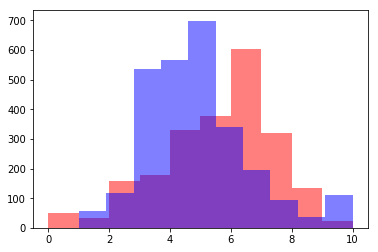

In [1505]:
p08=plt.hist(df08['greenhouse_gas_score'],color='r', alpha = 0.5)
p18=plt.hist(df18['greenhouse_gas_score'],color='b', alpha = 0.5)
plt.show()
# 哇偶，可以看出18年的greenhouse_gas_score有所下降！
# 企鹅宝宝，，，

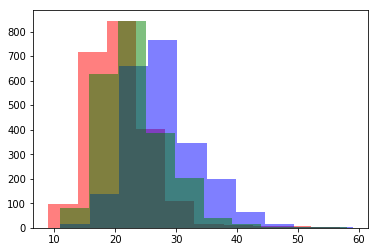

In [1506]:
city=plt.hist(df08['city_mpg'],color='r', alpha = 0.5)
hwy=plt.hist(df08['hwy_mpg'],color='b', alpha = 0.5)
cmb = plt.hist(df08['cmb_mpg'],color='g', alpha = 0.5)
plt.show()
# 从数据可以推断出city是在城市的速度（miles per hour）
# hwy是高速的，cmb是联合的

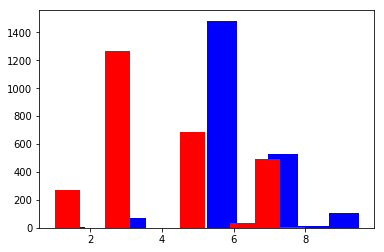

In [1507]:
p08=plt.hist(df08['air_pollution_score'],color='b')
p18=plt.hist(df18['air_pollution_score'],color='r')

# 也是下降了，不好看
# 这里没有家alpha，没有透明度，一下就记住了对不对

### PS：数据的链接地址有所有数据的联合csv下载，有兴趣的来啊！

# /13 结论和可视展示/ 得出结论
使用下列空间来处理数据集clean_08.csv 和clean_18.csv中的以下问题

## Q1: 与2008年相比，2018年是否有更多的车型（去重后）使用替代能源？比例增长了多少？

- 这部分feature pdf中没有特殊说明，bing出来：
- CNG 压缩天然气
- dissel 柴油
- Gasoline 汽油
- ethanol 乙醇
- gas 天然气

瞎想的（可以忽悠不懂的）
1. CNG是压缩天然气，另外一种是液化天然气LNG（C代表compressed，L代表liquid，LNG可以制造CNG，NG是不经压缩的gas）。后者更环保因为是液态，行驶也更远。但是前一种更加普遍（因为可以使用现在的汽油汽车改装，难道混合动力的都是这个货？）
1. 乙醇更环保,天燃气是混合物,里面可能包含一些S,N这些元素.当这些元素燃烧时会产生污染气体.乙醇燃烧的产物是二氧化碳和水.再者乙醇是可再生资源,所以目前有很多国家在汽油用填加乙醇,已减少汽油的使用量。
1. 在18年的数据中还有电力汽车（我的特斯拉啊，看着就帅！，，，，这模型还挺重的）马克思，，哦不马斯克的Solar City了解一下。
1. 综上所述，由于各年的value不同，我们就分为两个阵营进行比较（谁说要加权来的，你出来，我保证，，，不打死你，，，）Gasoline和diesel作为传统能源，其他都粗暴的归为清洁能源。

In [1508]:
df08.groupby(['fuel']).count()

,model,displ,cyl,trans,drive,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
fuel,,,,,,,,,,,,,
CNG,2,2,2,2,2,2,2,2,2,2,2,2,2
Gasoline,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067,2067
diesel,7,7,7,7,7,7,7,7,7,7,7,7,7
ethanol,66,66,66,66,66,66,66,66,66,66,66,66,66
gas,65,65,65,65,65,65,65,65,65,65,65,65,65


In [1509]:
df18.groupby(['fuel']).count()

,model,displ,cyl,trans,drive,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
fuel,,,,,,,,,,,,,
Diesel,62,62,62,62,62,62,62,62,62,62,62,62,62
Electricity,66,66,66,66,66,66,66,66,66,66,66,66,66
Ethanol,94,94,94,94,94,94,94,94,94,94,94,94,94
Gas,94,94,94,94,94,94,94,94,94,94,94,94,94
Gasoline,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434,2434


In [1510]:
cleanlist = ['cng', 'ethanol', 'gas', 'electricity']
# 先制定清洁能源的备选

def cleanratio(df):
    cnumber = 0
    fuel_list = list(set(df['fuel'].values))
    
    for i in fuel_list:
        if i.lower() in cleanlist:
        # 本例子中i不要变化，因为后面还要根据i来匹配
            cnumber = cnumber + df[df['fuel'] == i].shape[0]
    return round(cnumber / df.shape[0],4)
    # 使用round控制小数的精度：round（你要显示的数，你要显示的小数位数）
            
print(cleanratio(df08))
print(cleanratio(df18))
# 可见从6%增长到了9%

0.0603
0.0924


## Q2: 各车辆类别（veh_class）在燃料经济性方面的改进（mpg 的增长）是多少？

In [1511]:
# 经过观察，发现cmb在city和hwy之间，应该是经过加权乐的，直接比较他
mpgc08 = df08.groupby(['veh_class'])['cmb_mpg'].mean()
# 其实还可以发现value的种类不同，有兴趣规整一下不少年？

In [1512]:
mpgc18 = df18.groupby(['veh_class'])['cmb_mpg'].mean()

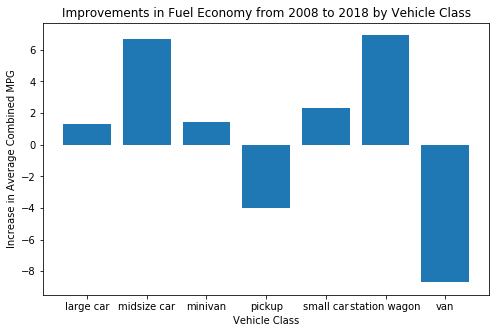

In [1513]:
# only plot the classes that exist in both years
inc.dropna(inplace=True)
plt.subplots(figsize=(8, 5))
plt.bar(inc.index, inc)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');
# 美化美化，有兴趣不？

## Q3: SmartWay 车辆的特点是什么？ 它们是否随着时间而改变？

In [1514]:
# smartway labels for 2008
df08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [1515]:
# get all smartway vehicles in 2008
smart_08 = df08.query('smartway == "yes"')
print(smart_08.info())
smart_08.mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 6 to 2066
Data columns (total 14 columns):
model                   625 non-null object
displ                   625 non-null float64
cyl                     625 non-null int64
trans                   625 non-null object
drive                   625 non-null object
fuel                    625 non-null object
cert_region             625 non-null object
veh_class               625 non-null object
air_pollution_score     625 non-null float64
city_mpg                625 non-null float64
hwy_mpg                 625 non-null float64
cmb_mpg                 625 non-null float64
greenhouse_gas_score    625 non-null float64
smartway                625 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 73.2+ KB
None


displ                    2.49232
cyl                      4.66400
air_pollution_score      6.99680
city_mpg                21.08640
hwy_mpg                 28.26080
cmb_mpg                 23.76640
greenhouse_gas_score     7.02720
dtype: float64

In [1516]:
print(df18.smartway.unique())
smart_18 = df18.query('smartway == "Yes" or smartway == "Elite"')
print(smart_18.info())
smart_18.mean()

['No' 'Yes' 'Elite']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 57 to 2749
Data columns (total 14 columns):
model                   422 non-null object
displ                   422 non-null float64
cyl                     422 non-null int64
trans                   422 non-null object
drive                   422 non-null object
fuel                    422 non-null object
cert_region             422 non-null object
veh_class               422 non-null object
air_pollution_score     422 non-null float64
city_mpg                422 non-null float64
hwy_mpg                 422 non-null float64
cmb_mpg                 422 non-null float64
greenhouse_gas_score    422 non-null float64
smartway                422 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 49.5+ KB
None


displ                    1.879147
cyl                      4.071090
air_pollution_score      5.246445
city_mpg                38.568720
hwy_mpg                 43.710900
cmb_mpg                 40.469194
greenhouse_gas_score     8.146919
dtype: float64

In [1517]:
'''
counts = wine_df.groupby(['quality', 'color']).count()['pH']
# 随便选了pH列，可以写循环输出所有的
counts.plot(kind='bar', color = ['red', 'blue'], alpha = .7)
plt.xlabel('Quality and Color', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.title('Counts by Wine Color and Quality', fontsize = 18)
# 我把title也拆出来了为了能够指定大小，这样plot也比较短
'''

"\ncounts = wine_df.groupby(['quality', 'color']).count()['pH']\n# 随便选了pH列，可以写循环输出所有的\ncounts.plot(kind='bar', color = ['red', 'blue'], alpha = .7)\nplt.xlabel('Quality and Color', fontsize = 16)\nplt.ylabel('Count', fontsize = 16)\nplt.title('Counts by Wine Color and Quality', fontsize = 18)\n# 我把title也拆出来了为了能够指定大小，这样plot也比较短\n"

In [1518]:
'''
pn08=plt.bar(x = smart_08.index, height = smart_08.mean(),color='b')
pn18=plt.bar(x = smart_18, height = smart_18.mean(),color='r')

# 也是下降了，不好看
# 这里没有家alpha，没有透明度，一下就记住了对不对
'''

"\npn08=plt.bar(x = smart_08.index, height = smart_08.mean(),color='b')\npn18=plt.bar(x = smart_18, height = smart_18.mean(),color='r')\n\n# 也是下降了，不好看\n# 这里没有家alpha，没有透明度，一下就记住了对不对\n"

## Q4: 哪些功能与更好的燃油经济性有关？What features are associated with better fuel economy?
You can explore trends between cmb_mpg and the other features in this dataset, or filter this dataset like in the previous question and explore the properties of that dataset. For example, you can select all vehicles that have the top 50% fuel economy ratings like this.

In [1519]:
# 这里课程给出的答案好奇怪，等我想想的
top_08 = df08.query('cmb_mpg > cmb_mpg.mean()')
top_08.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,3.627124,6.151484,6.325486,25.225179,33.011259,28.164790,5.032753
std,1.282356,1.877275,0.975360,4.807190,4.486190,4.463705,1.973947
min,1.500000,4.000000,1.000000,20.000000,26.000000,24.000000,0.000000
25%,2.500000,4.000000,6.000000,22.000000,30.000000,25.000000,4.000000
50%,3.500000,6.000000,6.000000,24.000000,32.000000,27.000000,5.000000
75%,4.600000,8.000000,7.000000,27.000000,35.000000,30.000000,6.000000
max,7.000000,12.000000,9.500000,57.000000,59.000000,58.000000,10.000000


In [1520]:
top_18 = df18.query('cmb_mpg > cmb_mpg.mean()')
top_18.describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,1.978889,4.074074,4.933333,29.712037,36.646296,32.310185,6.530556
std,0.493440,0.569599,1.857081,15.371140,12.394836,13.970812,1.562712
min,0.600000,2.000000,1.000000,21.000000,26.000000,25.000000,4.000000
25%,1.600000,4.000000,3.000000,23.000000,31.000000,26.000000,5.000000
50%,2.000000,4.000000,5.000000,25.000000,33.000000,28.000000,6.000000
75%,2.000000,4.000000,7.000000,29.000000,37.000000,32.000000,7.000000
max,4.000000,6.000000,8.000000,145.000000,121.000000,133.000000,10.000000


## 最后一个问题！对于 2008 年生产且 2018 年仍在生产中的车型，mpg 有多少改进，哪些车辆的改进最多？
这个问题是关于 2008 年以来不断更新换代且 2018 年仍在生产的车型。要回答此问题，我们需要找到两个数据集中都存在的车型，那么先让我们来了解如何将两个数据集合并。

In [1521]:
print(df18.shape)
df18.columns

(2750, 14)


Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [1522]:
print(df08.shape)
print(df08.columns)
df08.columns

(2207, 14)
Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')


Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [1523]:
# 需要使用merge将2个数据融合
# 就能根据mode有2个以上的value count来判断是否两个都有了

In [1524]:
df08.rename(
    columns = lambda x: x[:10] + '_2008', inplace = True)
df08.rename(columns={'model_2008':'model'},inplace=True)
len(df08.columns)
df08.columns

Index(['model', 'displ_2008', 'cyl_2008', 'trans_2008', 'drive_2008',
       'fuel_2008', 'cert_regio_2008', 'veh_class_2008', 'air_pollut_2008',
       'city_mpg_2008', 'hwy_mpg_2008', 'cmb_mpg_2008', 'greenhouse_2008',
       'smartway_2008'],
      dtype='object')

In [1525]:
# 为什么要有个一样的model呢，因为合并时候要有一列相同才好合并么
# merge的说明
df_combined = pd.merge(df08,df18,on=['model'])
df_combined.shape
df_combined

,model,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_regio_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,...,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,4WD,Gasoline,CA,small SUV,3.0,26.0,27.0,27.0,6.0,No
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,4WD,Gasoline,FA,small SUV,3.0,26.0,27.0,27.0,6.0,No
2,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,2WD,Gasoline,CA,small SUV,3.0,19.0,27.0,22.0,4.0,No
3,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,2WD,Gasoline,CA,small SUV,3.0,20.0,27.0,23.0,5.0,No
4,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,2WD,Gasoline,FA,small SUV,3.0,19.0,27.0,22.0,4.0,No
5,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,2WD,Gasoline,FA,small SUV,3.0,20.0,27.0,23.0,5.0,No
6,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,4WD,Gasoline,CA,small SUV,3.0,18.0,26.0,21.0,4.0,No
7,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,4WD,Gasoline,CA,small SUV,3.0,19.0,26.0,22.0,4.0,No
8,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,4WD,Gasoline,FA,small SUV,3.0,18.0,26.0,21.0,4.0,No
9,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,25.0,...,4WD,Gasoline,FA,small SUV,3.0,19.0,26.0,22.0,4.0,No


In [1526]:
df_combined.groupby('model')['city_mpg'].count()
# class的方法有问题，to be continue

model
ACURA MDX                    20
ACURA RDX                     8
AUDI A3                      24
AUDI A4                      32
AUDI A6                      36
AUDI A8 L                    16
AUDI Q7                      16
AUDI R8                      16
AUDI S4                       8
AUDI S5                       4
AUDI S6                       4
AUDI S8                       4
AUDI TT Coupe                12
AUDI TT Roadster             12
BMW 750i                      8
BMW Alpina B7                 4
BMW M5                        8
BMW M6 Convertible           16
BUICK Enclave                16
CADILLAC CTS                100
CADILLAC Escalade            16
CHEVROLET Colorado          240
CHEVROLET Corvette           48
CHEVROLET Equinox            96
CHEVROLET Impala             64
CHEVROLET Malibu             48
CHEVROLET Silverado 15      864
CHEVROLET Suburban 1500     168
CHEVROLET Tahoe 1500        208
CHRYSLER 300                168
                           ... 
PO